<a href="https://colab.research.google.com/github/noelibaeza/FINAL_DIPLOMATURA/blob/marcos/trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabajo Final - Diplomatura en Ciencia de Datos Aplicada 📊
### Integrantes:
* Boladeras Facundo
* Fontanini Pablo
* Miller Marcos
* Baeza Noeli

In [85]:
import time
import itertools
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

In [86]:
pd.set_option('display.max_columns', None)

In [87]:
dataset = pd.read_csv('./datos.csv', encoding='UTF-8')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CICLO              176 non-null    object 
 1   EVENTO             176 non-null    object 
 2   LOTE               176 non-null    object 
 3   SUP                176 non-null    float64
 4   pp Nov             176 non-null    object 
 5   pp Dic             176 non-null    object 
 6   pp Ene             176 non-null    object 
 7   IPC                176 non-null    object 
 8   EROSION POTENCIAL  176 non-null    object 
 9   EVI 1 Nov media    176 non-null    float64
 10  EVI 1 Nov min      176 non-null    float64
 11  EVI 1 Nov max      176 non-null    float64
 12  EVI 17 Nov media   176 non-null    float64
 13  EVI 17 Nov min     176 non-null    float64
 14  EVI 17 Nov max     176 non-null    float64
 15  EVI 3 Dic media    176 non-null    float64
 16  EVI 3 Dic min      176 non

In [88]:
dataset.head(5)

,CICLO,EVENTO,LOTE,SUP,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,EVI 17 Nov media,EVI 17 Nov min,EVI 17 Nov max,EVI 3 Dic media,EVI 3 Dic min,EVI 3 Dic max,EVI 19 Dic media,EVI 19 Dic min,EVI 19 Dic max,EVI 1 Ene media,EVI 1 Ene min,EVI 1 Ene max,EVI 17 Ene media,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,RINDE,H_Nov,H_Dic,H_Ene,Unnamed: 34
0,2001/02,Neutro,TEMPEL N2,64.8,353,140,156,52,moderadamente susceptible,0.21,0.20,0.24,0.47,0.44,0.49,0.78,0.75,0.81,0.76,0.68,0.77,0.62,0.58,0.64,0.62,0.61,0.62,0.49,0.47,0.51,6675,1458,677,1064,NaN
1,2001/02,Neutro,3D,118.4,353,140,156,34,practicamente no susceptible,0.51,0.46,0.62,0.70,0.64,0.75,0.76,0.65,0.80,0.64,0.62,0.69,0.55,0.49,0.59,0.38,0.30,0.58,0.19,0.16,0.30,8357,1463,696,1111,NaN
2,2001/02,Neutro,6NORTE,143.6,353,140,156,32,moderadamente susceptible,0.48,0.46,0.51,0.68,0.55,0.76,0.77,0.71,0.83,0.64,0.54,0.70,0.53,0.49,0.56,0.31,0.29,0.34,0.19,0.16,0.33,7296,1459,689,1093,NaN
3,2001/02,Neutro,BUEYES NORTE,143.1,358,136,120,32,moderadamente susceptible,0.33,0.25,0.48,0.38,0.20,0.63,0.46,0.23,0.64,0.52,0.44,0.56,0.57,0.45,0.71,0.59,0.45,0.76,0.47,0.32,0.60,4668,1455,689,1092,NaN
4,2001/02,Neutro,4,69.4,337,153,170,50,moderadamente susceptible,0.37,0.24,0.43,0.56,0.44,0.66,0.63,0.51,0.72,0.59,0.51,0.65,0.55,0.49,0.58,0.51,0.48,0.53,0.30,0.29,0.34,5848,1483,759,1239,NaN


In [89]:
duplicadas = dataset.duplicated()
duplicadas.all()

False

In [90]:
dataset.drop(columns=['Unnamed: 34'], inplace=True)

In [91]:
dataset.describe()

,SUP,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,EVI 17 Nov media,EVI 17 Nov min,EVI 17 Nov max,EVI 3 Dic media,EVI 3 Dic min,EVI 3 Dic max,EVI 19 Dic media,EVI 19 Dic min,EVI 19 Dic max,EVI 1 Ene media,EVI 1 Ene min,EVI 1 Ene max,EVI 17 Ene media,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,RINDE
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,84.665341,0.368182,0.317443,0.426250,0.529318,0.431477,0.605227,0.626875,0.552216,0.690852,0.598352,0.522386,0.653580,0.549432,0.486136,0.604148,0.457557,0.399148,0.525114,0.305682,0.257443,0.384205,7019.642045
std,46.742479,0.106213,0.098571,0.121032,0.127600,0.129054,0.139742,0.086420,0.095014,0.095510,0.090245,0.108153,0.091278,0.103943,0.109194,0.109264,0.116439,0.115866,0.122801,0.081756,0.077701,0.104785,2468.137316
min,8.500000,0.170000,0.170000,0.180000,0.190000,0.000000,0.230000,0.340000,0.230000,0.340000,0.340000,0.240000,0.380000,0.220000,0.190000,0.250000,0.180000,0.150000,0.220000,0.150000,0.130000,0.170000,390.000000
25%,53.500000,0.290000,0.240000,0.340000,0.467500,0.337500,0.530000,0.580000,0.500000,0.640000,0.557500,0.447500,0.610000,0.500000,0.427500,0.560000,0.380000,0.320000,0.447500,0.250000,0.200000,0.307500,5610.250000
50%,76.550000,0.340000,0.300000,0.410000,0.555000,0.445000,0.640000,0.635000,0.560000,0.695000,0.610000,0.530000,0.660000,0.570000,0.510000,0.620000,0.470000,0.400000,0.535000,0.300000,0.250000,0.370000,7278.000000
75%,109.550000,0.430000,0.372500,0.500000,0.630000,0.512500,0.710000,0.690000,0.622500,0.750000,0.650000,0.600000,0.710000,0.620000,0.570000,0.670000,0.540000,0.480000,0.610000,0.360000,0.310000,0.450000,8678.750000
max,264.100000,0.670000,0.640000,0.780000,0.750000,0.720000,0.830000,0.900000,0.860000,0.940000,0.810000,0.790000,0.850000,0.770000,0.680000,0.820000,0.660000,0.640000,0.840000,0.530000,0.480000,0.730000,13315.000000


In [92]:
dataset.describe(include='O')

,CICLO,EVENTO,LOTE,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,H_Nov,H_Dic,H_Ene
count,176,176,176,176,176,176,176,176,176,176,176
unique,16,3,112,77,72,78,27,5,126,124,132
top,2005/06,Niña,1,55,164,202,50,moderadamente susceptible,1384,1169,1378
freq,20,77,4,13,13,13,44,80,4,5,4


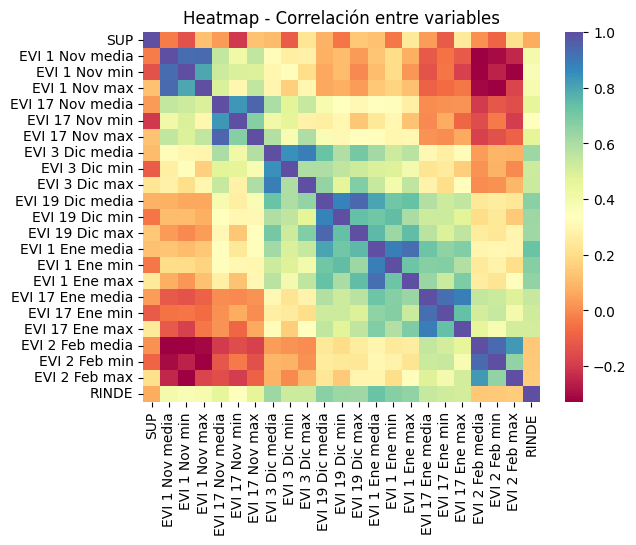

In [93]:
sns.heatmap(dataset.corr(numeric_only=True, method='pearson'), cmap='Spectral')
plt.title('Heatmap - Correlación entre variables')
plt.show()

In [94]:
df_categorico = dataset.select_dtypes(include=['object'])
pd.Series(df_categorico.columns)

0                 CICLO
1                EVENTO
2                  LOTE
3                pp Nov
4                pp Dic
5                pp Ene
6                   IPC
7     EROSION POTENCIAL
8                 H_Nov
9                 H_Dic
10                H_Ene
dtype: object

In [95]:
df_cuantitativo = dataset.select_dtypes(include=['float'])
pd.Series(df_cuantitativo.columns)

0                  SUP
1      EVI 1 Nov media
2        EVI 1 Nov min
3        EVI 1 Nov max
4     EVI 17 Nov media
5       EVI 17 Nov min
6       EVI 17 Nov max
7      EVI 3 Dic media
8        EVI 3 Dic min
9        EVI 3 Dic max
10    EVI 19 Dic media
11      EVI 19 Dic min
12      EVI 19 Dic max
13     EVI 1 Ene media
14       EVI 1 Ene min
15       EVI 1 Ene max
16    EVI 17 Ene media
17      EVI 17 Ene min
18      EVI 17 Ene max
19     EVI 2 Feb media
20       EVI 2 Feb min
21       EVI 2 Feb max
dtype: object

In [96]:
def chi_cuadrado(df):
  comb = list(itertools.combinations(df.columns, 2))

  alpha = 0.05

  resultado = list()
  for c in comb:
      contingency_table = pd.crosstab(df[c[0]], df[c[1]])
      stat, p_value, dof, expected_freq = ss.chi2_contingency(contingency_table)

      resultado.append({
          'Variable_1': c[0],
          'Variable_2': c[1],
          'p_value': p_value,
          'Independiente': p_value < alpha
      })

  df_resultado = pd.DataFrame(resultado)

  return df_resultado[df_resultado['Independiente'] == False]

In [97]:
chi_cuadrado(df_categorico)

,Variable_1,Variable_2,p_value,Independiente
1,CICLO,LOTE,0.859233,False
5,CICLO,IPC,0.329750,False
6,CICLO,EROSION POTENCIAL,0.106678,False
10,EVENTO,LOTE,0.587275,False
14,EVENTO,IPC,0.382621,False
19,LOTE,pp Nov,0.226455,False
20,LOTE,pp Dic,0.176818,False
24,LOTE,H_Nov,0.295819,False
25,LOTE,H_Dic,0.412535,False
26,LOTE,H_Ene,0.631071,False


In [98]:
def spearman(cuantitativo, categorico):
  comb = list(itertools.product(categorico.columns, cuantitativo.columns))

  alpha = 0.05

  resultado = list()
  for c in comb:
      spearman_corr, p_value = ss.spearmanr(categorico[c[0]], cuantitativo[c[1]])
      resultado.append({
          'Variable_categorica': c[0],
          'Variable_cuantitativa': c[1],
          'Correlacion_Spearman': spearman_corr,
          'p_value': p_value,
          'Independiente': p_value < alpha
      })

  df_resultado = pd.DataFrame(resultado)

  filtro = ((df_resultado['Independiente'] == False) & (~pd.isna(df_resultado['Correlacion_Spearman'])))

  return df_resultado[filtro]

In [99]:
spearman(df_cuantitativo, df_categorico)

,Variable_categorica,Variable_cuantitativa,Correlacion_Spearman,p_value,Independiente
0,CICLO,SUP,-0.084483,0.264935,False
1,CICLO,EVI 1 Nov media,0.120091,0.112381,False
2,CICLO,EVI 1 Nov min,0.126777,0.093606,False
3,CICLO,EVI 1 Nov max,0.102145,0.177343,False
6,CICLO,EVI 17 Nov max,-0.116476,0.123692,False
...,...,...,...,...,...
237,H_Ene,EVI 17 Ene min,0.013217,0.861785,False
238,H_Ene,EVI 17 Ene max,-0.066234,0.382452,False
239,H_Ene,EVI 2 Feb media,0.026518,0.726821,False
240,H_Ene,EVI 2 Feb min,0.010792,0.886954,False


In [100]:
def display_qqplots(df, filas, columnas):
    fig, axs = plt.subplots(filas, columnas, figsize=(20, 4))
    for i, col in enumerate(df.columns):
        ax = axs[i // columnas, i % columnas]
        ss.probplot(df[col], dist='norm', plot=ax)
        ax.set_title(col)
        ax.set_xlabel('Cuantiles')
        ax.set_ylabel('Valores')

    plt.tight_layout()
    plt.show()

<ipython-input-100-b06da3a13d2a>:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


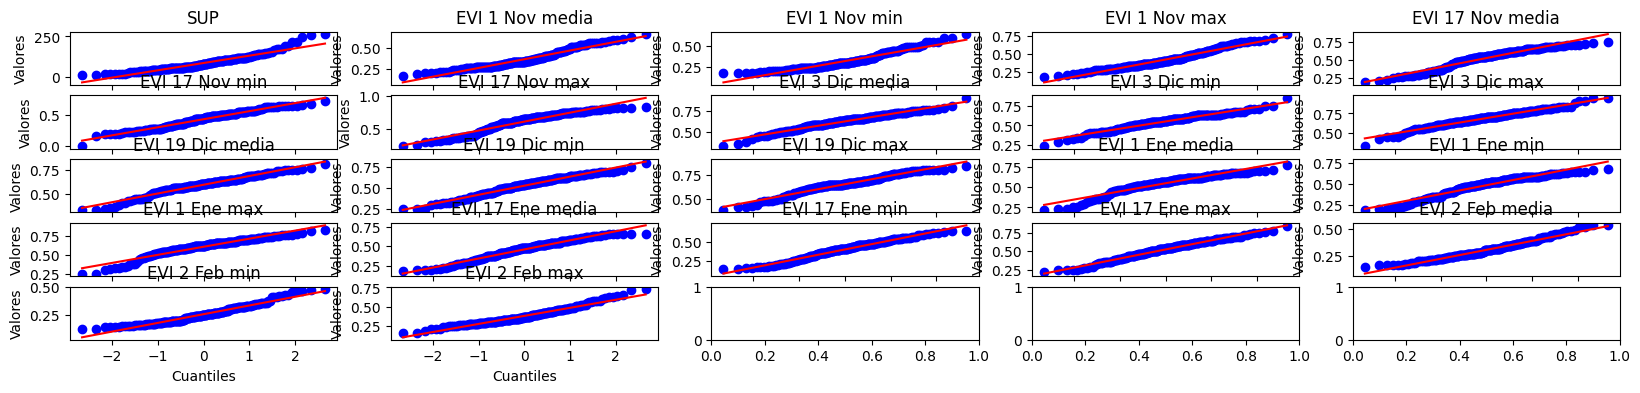

In [101]:
display_qqplots(df_cuantitativo, 5, 5)

In [102]:
def shapiro_wilk_test(df):
  alpha = 0.05

  resultado = list()
  for col in df.columns:
      stat, p_value = ss.shapiro(df[col])

      resultado.append({
          'Variable': col,
          'p_value': p_value,
          'Normalidad': p_value < alpha
      })

  df_resultado = pd.DataFrame(resultado)

  return df_resultado

In [103]:
shapiro_wilk_test(df_cuantitativo)

,Variable,p_value,Normalidad
0,SUP,7.743937e-08,True
1,EVI 1 Nov media,7.098867e-06,True
2,EVI 1 Nov min,2.132433e-07,True
3,EVI 1 Nov max,4.590365e-04,True
4,EVI 17 Nov media,3.475943e-06,True
5,EVI 17 Nov min,1.641833e-02,True
6,EVI 17 Nov max,6.789251e-07,True
7,EVI 3 Dic media,1.293613e-02,True
8,EVI 3 Dic min,2.015301e-03,True
9,EVI 3 Dic max,3.315178e-02,True


In [104]:
def kolmorogov_smirnow_test(df):
  alpha = 0.05

  resultado = []
  for col in df.columns:
      stat, p_value = ss.kstest(df[col], 'norm', N=df.shape[0])
      resultado.append({
          'Variable': col,
          'p_value': p_value,
          'Normalidad': p_value < alpha
      })

  df_resultado = pd.DataFrame(resultado)

  return df_resultado

In [105]:
kolmorogov_smirnow_test(df_cuantitativo)

,Variable,p_value,Normalidad
0,SUP,0.000000e+00,True
1,EVI 1 Nov media,1.576926e-54,True
2,EVI 1 Nov min,4.460693e-54,True
3,EVI 1 Nov max,2.378709e-55,True
4,EVI 17 Nov media,4.504544e-57,True
5,EVI 17 Nov min,2.374863e-53,True
6,EVI 17 Nov max,9.808205e-62,True
7,EVI 3 Dic media,2.070541e-73,True
8,EVI 3 Dic min,7.371983e-64,True
9,EVI 3 Dic max,2.180300e-76,True


In [106]:
scaler = StandardScaler()
df_cuantitativo = pd.DataFrame(
    scaler.fit_transform(df_cuantitativo),
    columns=df_cuantitativo.columns
)

In [107]:
pca = PCA(whiten=True)
pca.fit(df_cuantitativo)

PCA(whiten=True)

In [108]:
idx_pca = [f"PCA{i}" for i in range(1, df_cuantitativo.shape[1]+1)]

# autovectores
eigvec = pd.DataFrame(
    data=pca.components_,
    columns=df_cuantitativo.columns,
    index=idx_pca
)

In [109]:
eigvec

,SUP,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,EVI 17 Nov media,EVI 17 Nov min,EVI 17 Nov max,EVI 3 Dic media,EVI 3 Dic min,EVI 3 Dic max,EVI 19 Dic media,EVI 19 Dic min,EVI 19 Dic max,EVI 1 Ene media,EVI 1 Ene min,EVI 1 Ene max,EVI 17 Ene media,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max
PCA1,-0.034834,-0.079842,-0.068994,-0.075829,-0.173559,-0.129059,-0.171988,-0.272330,-0.223071,-0.243519,-0.307286,-0.275576,-0.290942,-0.311115,-0.286105,-0.284077,-0.246278,-0.229305,-0.233420,-0.112803,-0.119405,-0.115124
PCA2,0.022424,-0.339911,-0.336194,-0.311134,-0.302085,-0.253536,-0.288663,-0.142399,-0.132010,-0.127620,0.020273,0.009316,0.043290,0.050116,0.025066,0.062181,0.221894,0.194491,0.203800,0.309643,0.275919,0.266995
PCA3,-0.303201,0.322798,0.348801,0.264326,0.051360,0.180360,0.018574,-0.202624,-0.108290,-0.274762,-0.184846,-0.073079,-0.239060,-0.015966,0.115198,-0.121934,0.170728,0.270266,0.038529,0.293904,0.319770,0.176608
PCA4,0.580555,0.241273,0.092606,0.386917,-0.099074,-0.331107,0.035793,-0.089920,-0.307271,0.071689,-0.094968,-0.182807,-0.011072,0.066238,-0.041507,0.186981,0.086340,-0.023135,0.259191,-0.030192,-0.158782,0.182123
PCA5,-0.257179,0.076612,0.112293,0.049695,-0.272773,-0.168442,-0.293817,-0.169112,-0.057431,-0.207576,0.058678,0.172918,0.016170,0.166250,0.260783,0.103260,0.175063,0.229406,0.114544,-0.369790,-0.330473,-0.408108
PCA6,-0.151885,0.231631,0.230994,0.176918,-0.366164,-0.414999,-0.336240,0.282762,0.371236,0.195565,0.065980,0.032604,0.124645,-0.093017,-0.097929,-0.098032,-0.136717,-0.097467,-0.189921,0.147700,0.116839,0.121297
PCA7,-0.124423,-0.063511,-0.058281,-0.052251,0.013994,-0.000607,0.025574,0.266221,0.229562,0.340302,-0.271743,-0.419036,-0.182228,-0.142549,-0.197683,-0.135796,0.341106,0.328050,0.328744,-0.136215,-0.098321,-0.115690
PCA8,-0.433347,0.056310,-0.103039,0.128053,0.065828,-0.219032,0.260860,-0.093687,-0.466859,0.229918,0.230920,0.143205,0.347276,-0.246970,-0.264083,-0.183704,0.076464,0.058576,0.072885,-0.000060,-0.074271,0.055252
PCA9,0.472487,0.027918,0.086519,-0.003599,-0.005280,0.094727,-0.069426,-0.028537,0.133463,-0.139983,0.193221,0.410019,0.017246,-0.344483,-0.126523,-0.517569,0.163439,0.214839,0.104680,-0.021930,0.054486,-0.144421
PCA10,-0.163868,0.026668,-0.098765,0.051916,0.011753,0.159352,-0.064021,-0.036023,0.282397,-0.270840,0.017624,0.110972,-0.003639,-0.106540,-0.075314,-0.018948,-0.004270,-0.112293,0.250701,-0.111019,-0.501284,0.637844


In [110]:
def varianza_explicada(df):
  var_explained = pca.explained_variance_ratio_

  fig, ax = plt.subplots()
  ax.bar(
      x = np.arange(pca.n_components_) + 1,
      height = var_explained
  )

  for x, y in zip(np.arange(len(df.columns)) + 1, var_explained):
      label = round(y, 2)
      ax.annotate(
          label,
          (x,y),
          textcoords="offset points",
          xytext=(0,10),
          ha='center'
      )

  ax.set_xticks(np.arange(pca.n_components_) + 1)
  ax.set_ylim(0,1.1)
  ax.set_title("% de Varianza explicada por cada componente")
  ax.set_xlabel("Componente principal")
  ax.set_ylabel("% var exp")

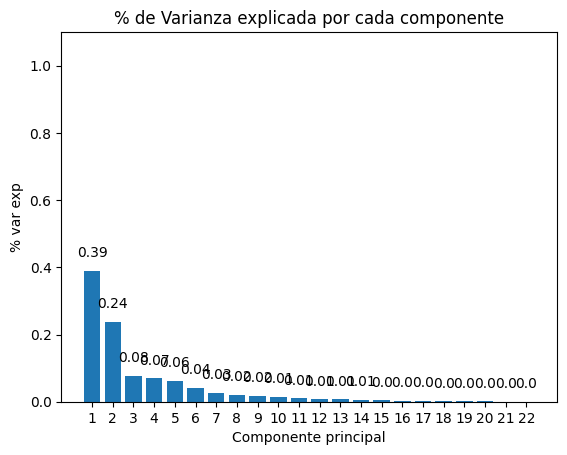

In [111]:
varianza_explicada(df_cuantitativo)

In [112]:
def varianza_explicada_acumulada(df):
  varexpacum = pca.explained_variance_ratio_.cumsum()
  fig, ax = plt.subplots()
  ax.plot(
      np.arange(len(df.columns)) + 1,
      varexpacum,
      marker = 'o'
  )

  for x, y in zip(np.arange(len(df.columns)) + 1, varexpacum):
      label = round(y, 2)
      ax.annotate(
          label,
          (x,y),
          textcoords="offset points",
          xytext=(0,10),
          ha='center'
      )

  ax.set_ylim(0, 1.1)
  ax.set_xticks(np.arange(pca.n_components_) +1)
  ax.set_title("Varianza acumulada explicada")
  ax.set_xlabel("Componentes Principales")
  ax.set_ylabel("% varianza explicada acumulada")
  plt.show()

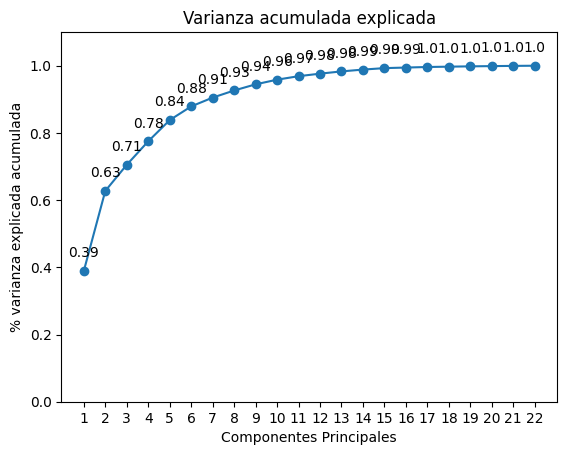

In [113]:
varianza_explicada_acumulada(df_cuantitativo)

In [116]:
pca = PCA(n_components=2, whiten=True)
pca.fit(df_cuantitativo)
transf = pca.transform(df_cuantitativo)
var_explained = pca.explained_variance_ratio_

In [119]:
# def display_biplot(df, var_explained):
#   fig, ax = plt.subplots(constrained_layout=True)

#   for i in range(2):
#     match i:
#       case 0:
#         label= 'desocupado'
#       case 1:
#         label= 'ocupado'
#     ax.scatter(
#         transf[df['ocupacion'] == i, 0],
#         transf[df['ocupacion'] == i, 1],
#         s=6,
#         label = label,

#         )
#   ax.legend()

#   feature_vectors = pca.components_.T

#   for i, fv in enumerate(feature_vectors):
#     ax.arrow(0,0, fv[0], fv[1], color='black', alpha=0.5, head_width=0.1)
#     ax.text(fv[0], fv[1], df.columns[i], color='black', ha='center', va='center')

#   ax.set_xlabel('PC1')
#   ax.set_ylabel('PC2')
#   ax.set_title('BIPLOT PCA')
#   ax.text(-3, -4, f'Vairanza explicada PC1: {var_explained[0]:.2f}', color='#000')
#   ax.text(-3, -5, f'Vairanza explicada PC2: {var_explained[1]:.2f}', color='#000')

#   plt.grid(True)
#   plt.show()

In [120]:
# display_biplot(dataset, var_explained)